# Statistics (a)

In [1]:
from pylab import plt
plt.style.use('ggplot')
import matplotlib as mpl
mpl.rcParams['font.family'] = 'serif'
# import warnings; warnings.simplefilter('ignore')

## Normality Tests

### Benchmark Case

In [2]:
import numpy as np
import numpy.random as npr
npr.seed(1000)
import scipy.stats as scs
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
def gen_paths(S0, r, sigma, T, M, I):
    ''' Generate Monte Carlo paths for geometric Brownian motion.
    
    Parameters
    ==========
    S0 : float
        initial stock/index value
    r : float
        constant short rate
    sigma : float
        constant volatility
    T : float
        final time horizon
    M : int
        number of time steps/intervals
    I : int
        number of paths to be simulated
        
    Returns
    =======
    paths : ndarray, shape (M + 1, I)
        simulated paths given the parameters
    '''
    dt = float(T) / M
    paths = np.zeros((M + 1, I))
    paths[0] = S0
    for t in range(1, M + 1):
        rand = np.random.standard_normal(I)
        rand = (rand - rand.mean()) / rand.std()
        paths[t] = paths[t - 1] * np.exp((r - 0.5 * sigma ** 2) * dt +
                                         sigma * np.sqrt(dt) * rand)
    return paths

In [4]:
S0 = 100.
r = 0.05
sigma = 0.2
T = 1.0
M = 50
I = 250000

In [5]:
paths = gen_paths(S0, r, sigma, T, M, I)

Text(0.5,1,'10 simulated paths of geometric Brownian motion')

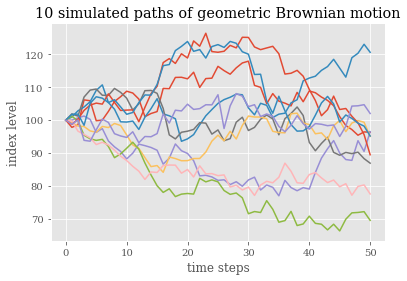

In [6]:
plt.plot(paths[:, :10])
plt.grid(True)
plt.xlabel('time steps')
plt.ylabel('index level')
plt.title('10 simulated paths of geometric Brownian motion')

In [7]:
log_returns = np.log(paths[1:]/paths[:-1])

In [8]:
# 첫번째 시뮬레이션 경로
paths[:,0].round(4)

array([100.    ,  97.821 ,  98.5573, 106.1546, 105.899 ,  99.8363,
       100.0145, 102.6589, 105.6643, 107.1107, 108.7943, 108.2449,
       106.4105, 101.0575, 102.0197, 102.6052, 109.6419, 109.5725,
       112.9766, 113.0225, 112.5476, 114.5585, 109.942 , 112.6271,
       112.7502, 116.3453, 115.0443, 113.9586, 115.8831, 117.3705,
       117.9185, 110.5539, 109.9687, 104.9957, 108.0679, 105.7822,
       105.1585, 104.3304, 108.4387, 105.5963, 108.866 , 108.3284,
       107.0077, 106.0034, 104.3964, 101.0637,  98.3776,  97.135 ,
        95.4254,  96.4271,  96.3386])

In [9]:
# 첫번째 시뮬레이션 경로의 로그수익률
log_returns[:,0].round(4)

array([-0.022 ,  0.0075,  0.0743, -0.0024, -0.059 ,  0.0018,  0.0261,
        0.0289,  0.0136,  0.0156, -0.0051, -0.0171, -0.0516,  0.0095,
        0.0057,  0.0663, -0.0006,  0.0306,  0.0004, -0.0042,  0.0177,
       -0.0411,  0.0241,  0.0011,  0.0314, -0.0112, -0.0095,  0.0167,
        0.0128,  0.0047, -0.0645, -0.0053, -0.0463,  0.0288, -0.0214,
       -0.0059, -0.0079,  0.0386, -0.0266,  0.0305, -0.0049, -0.0123,
       -0.0094, -0.0153, -0.0324, -0.0269, -0.0127, -0.0178,  0.0104,
       -0.0009])

In [10]:
def print_statistics(array):
    sta = scs.describe(array)
    print("%14s %15s" % ('statistic', 'value'))
    print(30 * "-")
    print("%14s %15.5f" % ('size', sta[0]))
    print("%14s %15.5f" % ('min', sta[1][0]))
    print("%14s %15.5f" % ('max', sta[1][1]))
    print("%14s %15.5f" % ('mean', sta[2]))
    print("%14s %15.5f" % ('std', np.sqrt(sta[3])))
    print("%14s %15.5f" % ('skew', sta[4]))
    print("%14s %15.5f" % ('kurtosis', sta[5]))    

In [11]:
print_statistics(log_returns.flatten())

     statistic           value
------------------------------
          size  12500000.00000
           min        -0.15664
           max         0.15371
          mean         0.00060
           std         0.02828
          skew         0.00055
      kurtosis         0.00085


C:\ProgramData\Miniconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'title: Histogram of log-returns and normal density function')

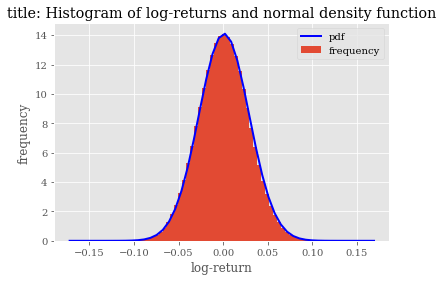

In [12]:
plt.hist(log_returns.flatten(), bins = 70, normed = True, label = 'frequency')
plt.grid(True)
plt.xlabel('log-return')
plt.ylabel('frequency')
x = np.linspace(plt.axis()[0], plt.axis()[1])
plt.plot(x, scs.norm.pdf(x, loc = r/M, scale = sigma / np.sqrt(M)),
        'b', lw=2, label = 'pdf')
plt.legend(loc = 0)
plt.title('title: Histogram of log-returns and normal density function')

Text(0.5,1,'Quantile-Quantile plot for log returns')

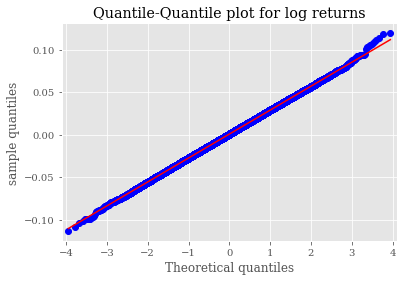

In [13]:
sm.qqplot(log_returns.flatten()[::500], line = 's')
plt.grid(True)
plt.xlabel('Theoretical quantiles')
plt.ylabel('sample quantiles')
plt.title('Quantile-Quantile plot for log returns')

In [14]:
def normality_tests(arr):
    print ("Skewness of data set %11.3f" % scs.skew(arr))
    print ("Skewness test p-value %10.3f" % scs.skewtest(arr)[1])
    print ("Kurtosis of data set %11.3f" % scs.kurtosis(arr))
    print ("Kurtosis test p-value %10.3f" % scs.kurtosistest(arr)[1])
    print ("Normality test p-value %9.3f" % scs.normaltest(arr)[1])

In [15]:
normality_tests(log_returns.flatten())

Skewness of data set       0.001
Skewness test p-value      0.430
Kurtosis of data set       0.001
Kurtosis test p-value      0.541
Normality test p-value     0.607


Text(0.5,1,'log data')

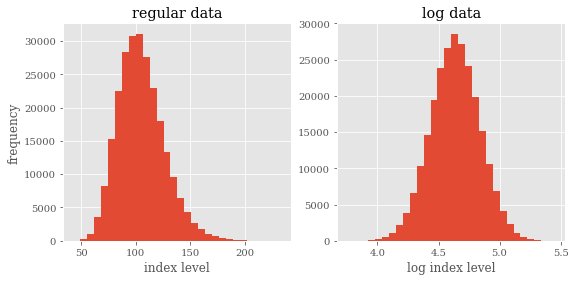

In [17]:
f, (ax1, ax2) = plt.subplots(1,2, figsize=(9,4))
ax1.hist(paths[-1], bins = 30)
ax1.grid(True)
ax1.set_xlabel('index level')
ax1.set_ylabel('frequency')
ax1.set_title('regular data')
ax2.hist(np.log(paths[-1]), bins = 30)
ax2.grid(True)
ax2.set_xlabel('log index level')
ax2.set_title('log data')

In [18]:
print_statistics(paths[-1])

     statistic           value
------------------------------
          size    250000.00000
           min        42.74870
           max       233.58435
          mean       105.12645
           std        21.23174
          skew         0.61116
      kurtosis         0.65182


In [19]:
print_statistics(np.log(paths[-1]))

     statistic           value
------------------------------
          size    250000.00000
           min         3.75534
           max         5.45354
          mean         4.63517
           std         0.19998
          skew        -0.00092
      kurtosis        -0.00327


In [20]:
normality_tests(paths[-1])

Skewness of data set       0.611
Skewness test p-value      0.000
Kurtosis of data set       0.652
Kurtosis test p-value      0.000
Normality test p-value     0.000


In [21]:
normality_tests(np.log(paths[-1]))

Skewness of data set      -0.001
Skewness test p-value      0.851
Kurtosis of data set      -0.003
Kurtosis test p-value      0.744
Normality test p-value     0.931


C:\ProgramData\Miniconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Histogram of log index levels and normal density function')

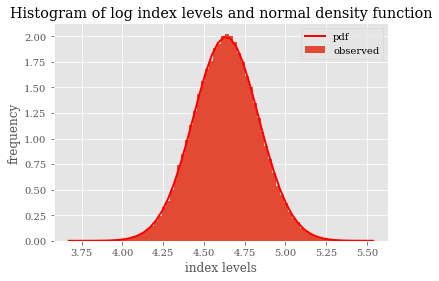

In [22]:
log_data = np.log(paths[-1])
plt.hist(log_data, bins = 70, normed = True, label = 'observed')
plt.grid(True)
plt.xlabel('index levels')
plt.ylabel('frequency')
x = np.linspace(plt.axis()[0], plt.axis()[1])
plt.plot(x, scs.norm.pdf(x, log_data.mean(), log_data.std()),
        'r', lw = 2, label = 'pdf')
plt.legend(loc = 0)
plt.title('Histogram of log index levels and normal density function')

Text(0.5,1,'Quantile-quantile plot for log index levels')

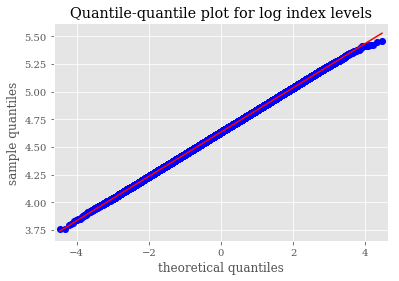

In [23]:
sm.qqplot(log_data, line = 's')
plt.grid(True)
plt.xlabel('theoretical quantiles')
plt.ylabel('sample quantiles')
plt.title('Quantile-quantile plot for log index levels')

### Real World Data

In [24]:
import pandas as pd

In [25]:
raw = pd.read_csv('source/tr_eikon_eod_data.csv',
                 index_col = 0, parse_dates = True)

In [26]:
raw.columns

Index(['AAPL.O', 'MSFT.O', 'INTC.O', 'AMZN.O', 'GS.N', 'SPY', '.SPX', '.VIX',
       'EUR=', 'XAU=', 'GDX', 'GLD'],
      dtype='object')

In [27]:
symbols = ['SPY', 'GLD', 'AAPL.O', 'MSFT.O']

In [28]:
data = raw[symbols]
data = data.dropna()

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1972 entries, 2010-01-04 to 2017-10-31
Data columns (total 4 columns):
SPY       1972 non-null float64
GLD       1972 non-null float64
AAPL.O    1972 non-null float64
MSFT.O    1972 non-null float64
dtypes: float64(4)
memory usage: 77.0 KB


In [30]:
data.head()

,SPY,GLD,AAPL.O,MSFT.O
Date,,,,
2010-01-04,113.33,109.80,30.572827,30.950
2010-01-05,113.63,109.70,30.625684,30.960
2010-01-06,113.71,111.51,30.138541,30.770
2010-01-07,114.19,110.82,30.082827,30.452
2010-01-08,114.57,111.37,30.282827,30.660


Text(0.5,1,'Evolution of stock and index levels over time')

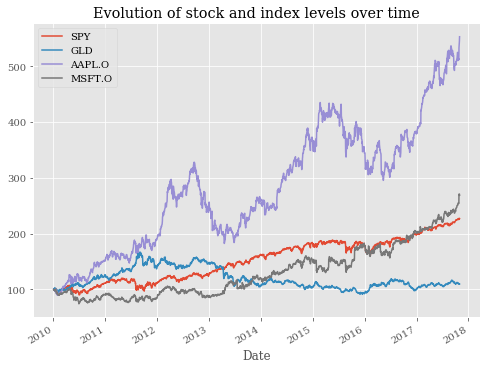

In [31]:
(data / data.iloc[0,:] * 100).plot(figsize = (8, 6), grid = True)
plt.title('Evolution of stock and index levels over time')

In [32]:
log_returns = np.log(data / data.shift(1))
log_returns.head()

,SPY,GLD,AAPL.O,MSFT.O
Date,,,,
2010-01-04,NaN,NaN,NaN,NaN
2010-01-05,0.002644,-0.000911,0.001727,0.000323
2010-01-06,0.000704,0.016365,-0.016034,-0.006156
2010-01-07,0.004212,-0.006207,-0.001850,-0.010389
2010-01-08,0.003322,0.004951,0.006626,0.006807


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000DD00815BE0>,
      dtype=object)

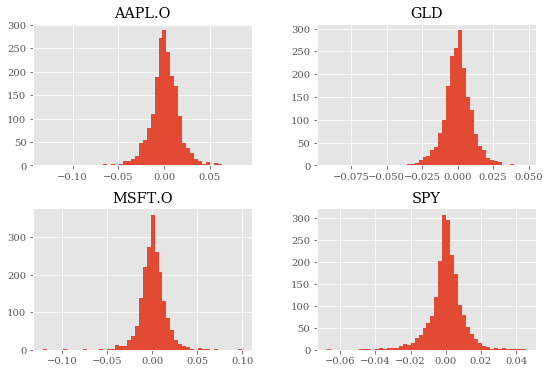

In [33]:
log_returns.hist(bins = 50, figsize = (9, 6))

In [34]:
for sym in symbols:
    print("\nResults for symbol %s" % sym)
    print(30 * "-")
    log_data = np.array(log_returns[sym].dropna())
    print_statistics(log_data)


Results for symbol SPY
------------------------------
     statistic           value
------------------------------
          size      1971.00000
           min        -0.06734
           max         0.04545
          mean         0.00042
           std         0.00934
          skew        -0.46886
      kurtosis         4.54265

Results for symbol GLD
------------------------------
     statistic           value
------------------------------
          size      1971.00000
           min        -0.09191
           max         0.04795
          mean         0.00005
           std         0.01048
          skew        -0.60078
      kurtosis         5.42113

Results for symbol AAPL.O
------------------------------
     statistic           value
------------------------------
          size      1971.00000
           min        -0.13187
           max         0.08502
          mean         0.00087
           std         0.01605
          skew        -0.26179
      kurtosis         4.9

Text(0.5,1,'Quantile-quantile plot for S&P 500 log returns')

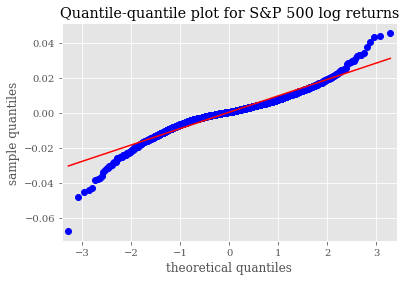

In [35]:
sm.qqplot(log_returns['SPY'].dropna(), line = 's')
plt.grid(True)
plt.xlabel('theoretical quantiles')
plt.ylabel('sample quantiles')
plt.title('Quantile-quantile plot for S&P 500 log returns')

In [36]:
for sym in symbols:
    print("\nResults for symbol %s" % sym)
    print(32 * "-")
    log_data = np.array(log_returns[sym].dropna())
    normality_tests(log_data)


Results for symbol SPY
--------------------------------
Skewness of data set      -0.469
Skewness test p-value      0.000
Kurtosis of data set       4.543
Kurtosis test p-value      0.000
Normality test p-value     0.000

Results for symbol GLD
--------------------------------
Skewness of data set      -0.601
Skewness test p-value      0.000
Kurtosis of data set       5.421
Kurtosis test p-value      0.000
Normality test p-value     0.000

Results for symbol AAPL.O
--------------------------------
Skewness of data set      -0.262
Skewness test p-value      0.000
Kurtosis of data set       4.922
Kurtosis test p-value      0.000
Normality test p-value     0.000

Results for symbol MSFT.O
--------------------------------
Skewness of data set      -0.101
Skewness test p-value      0.067
Kurtosis of data set       7.701
Kurtosis test p-value      0.000
Normality test p-value     0.000


## Portfolio Optimization

### The Data

In [37]:
symbols = ['AAPL.O', 'MSFT.O', 'AMZN.O', 'GDX', 'GLD' ]
noa = len(symbols)

In [38]:
data = raw[symbols]

Text(0.5,1,'Stock prices over time')

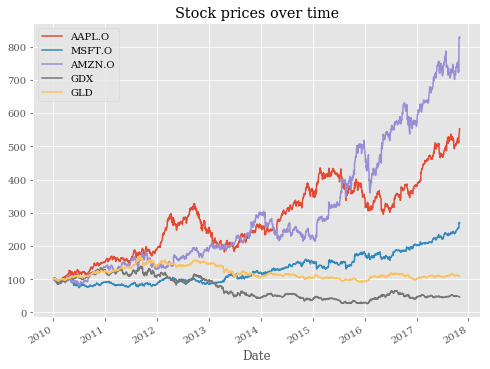

In [39]:
(data / data.iloc[0, :] * 100).plot(figsize = (8,6), grid = True)
plt.title('Stock prices over time')

In [40]:
rets = np.log(data/data.shift(1))
rets.mean() * 252 # annualized log return

AAPL.O    0.218633
MSFT.O    0.126401
AMZN.O    0.269869
GDX      -0.096212
GLD       0.012069
dtype: float64

In [41]:
rets.cov() * 252

,AAPL.O,MSFT.O,AMZN.O,GDX,GLD
AAPL.O,0.064899,0.022504,0.026932,0.014669,0.001510
MSFT.O,0.022504,0.050234,0.029146,0.010995,-0.000426
AMZN.O,0.026932,0.029146,0.097792,0.009917,-0.001584
GDX,0.014669,0.010995,0.009917,0.150716,0.048760
GLD,0.001510,-0.000426,-0.001584,0.048760,0.027666


### The Basic Theory

In [137]:
weights = np.random.random(noa) # noa = number of assets
weights /= sum(weights)

In [138]:
weights

array([0.21271266, 0.22129235, 0.15925511, 0.20108992, 0.20564996])

In [139]:
np.dot(rets.mean(), weights) * 252 
# annualized expected portfolio return

0.10059035020532389

In [140]:
# expected portfolio volatility
np.sqrt(np.dot(weights.T, np.dot(rets.cov() * 252, weights)))

0.16742134760372995

In [141]:
prets = []
pvols = []
for p in range(2500):
    weights = np.random.random(noa)
    weights /= sum(weights)
    pret = np.sum(rets.mean() * weights) * 252
    pvol = np.sqrt(np.dot(weights.T, np.dot(rets.cov() * 252, weights)))
    prets.append(pret)
    pvols.append(pvol)
prets = np.array(prets)
pvols = np.array(pvols)

Text(0.5,1,'Expected return and volatility for \ndifferent/random portfolio weights')

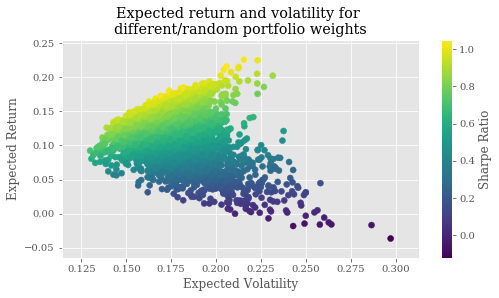

In [142]:
r_f = 0.00 # risk free rate

plt.figure(figsize = (8,4))
plt.scatter(pvols, prets, c = (prets - r_f) / pvols, marker='o')
# c를 Sharpe ratio로.
plt.grid(True)
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')
plt.colorbar(label = 'Sharpe Ratio')
plt.title('Expected return and volatility for \ndifferent/random portfolio weights')

In [143]:
def statistics(weights, r_f = 0):
    weights = np.array(weights)
    pret = np.sum(rets.mean() * weights) * 252
    pvol = np.sqrt(np.dot(weights.T, np.dot(rets.cov() * 252, weights)))
    Sharpe_ratio = (pret - r_f) / pvol
    return np.array([pret, pvol, Sharpe_ratio])

In [144]:
import scipy.optimize as sco

#### 우리는 샤프지수를 최대화하고 싶다. 그러면 -sharpe 를 최소화 하면 되는 문제이다.

In [145]:
def min_func_sharpe(weights):
    return -statistics(weights)[2]

In [146]:
cons = ({'type' : 'eq','fun': lambda x: np.sum(x) - 1})

In [147]:
bnds = tuple((0,1) for x in range(noa))

In [148]:
bnds # 주식 입력값의 범위는 0과 1사이로 제한

((0, 1), (0, 1), (0, 1), (0, 1), (0, 1))

In [149]:
init_w = [1/noa,] * noa # 초기 weight: 균등 배분
init_w

[0.2, 0.2, 0.2, 0.2, 0.2]

In [150]:
%%time
opts = sco.minimize(min_func_sharpe, init_w, method = 'SLSQP',
                   bounds = bnds, constraints = cons)

Wall time: 159 ms


In [151]:
opts

     fun: -1.0556617020460348
     jac: array([ 4.79221344e-05, -6.97374344e-05,  5.30928373e-05,  8.51281345e-01,
       -4.90397215e-04])
 message: 'Optimization terminated successfully.'
    nfev: 49
     nit: 7
    njev: 7
  status: 0
 success: True
       x: array([4.74033032e-01, 5.03590008e-02, 3.93814816e-01, 8.30498864e-17,
       8.17931510e-02])

In [152]:
opts['x'].round(3) # optimal weight (maximizes Sharpe Ratio)

array([0.474, 0.05 , 0.394, 0.   , 0.082])

In [153]:
statistics(opts['x']).round(3) # return, vol, sharpe

array([0.217, 0.206, 1.056])

In [154]:
def min_func_variance(weights):
    return statistics(weights)[1] ** 2

In [155]:
optv = sco.minimize(min_func_variance, init_w,
                    method = 'SLSQP', bounds = bnds,
                    constraints = cons)

In [156]:
optv

     fun: 0.015978878561911988
     jac: array([0.03154033, 0.03221243, 0.03183019, 0.06642421, 0.03195841])
 message: 'Optimization terminated successfully.'
    nfev: 70
     nit: 10
    njev: 10
  status: 0
 success: True
       x: array([1.20347102e-01, 2.30912816e-01, 7.01553015e-02, 2.68272275e-17,
       5.78584780e-01])

In [157]:
optv['x'].round(3) # MVP weight

array([0.12 , 0.231, 0.07 , 0.   , 0.579])

In [159]:
statistics(optv['x']).round(3)

array([0.081, 0.126, 0.644])

### Efficient Frontier
여러 개의 초기 조건(target returns)을 가지고 반복한다. 목표 수익률을 고정시키고 그 수익률을 달성하면서 최소의 변동성을 가지는 포트폴리오 비중을 계산하는 것이 목표이다.

In [160]:
cons = ({'type': 'eq', 'fun': lambda x: statistics(x)[0] - tret},
       {'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
bnds = tuple((0,1) for x in weights)

In [161]:
def min_func_port(weights): 
    return statistics(weights)[1] # returns portfolio's volatility

In [167]:
%%time
trets = np.linspace(0, 0.25, 101)
tvols = []
for tret in trets:
    cons = ({'type': 'eq', 'fun': lambda x: statistics(x)[0] - tret},
            {'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    res = sco.minimize(min_func_port, init_w, method = 'SLSQP',
                           bounds = bnds, constraints = cons)
    tvol = res['fun']
    tvols.append(tvol)
tvols = np.array(tvols)

Wall time: 21.8 s


Text(0.5,1,'Feasible Set and Efficient Frontier of 5 Assets\n(AAPL, MSFT, AMZN, GDX, GLD)')

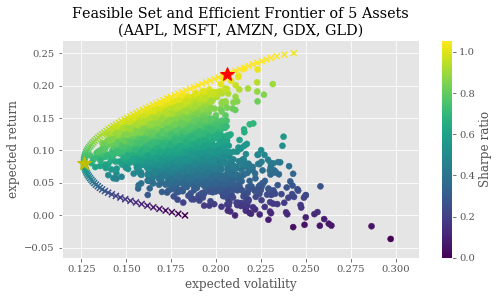

In [174]:
plt.figure(figsize = (8, 4))
plt.scatter(pvols, prets, c = prets / pvols, marker = 'o') # Randomly generated Portfolios
plt.scatter(tvols, trets, c = trets / tvols, marker = 'x') # Efficinet Frontier
plt.plot(statistics(opts['x'])[1], statistics(opts['x'])[0], # Market Portfolio
         'r*', markersize = 15.0)
plt.plot(statistics(optv['x'])[1], statistics(optv['x'])[0], # Minimum Variance Portfolio
         'y*', markersize = 15.0)
plt.grid(True)
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label = 'Sharpe ratio')
plt.title('Feasible Set and Efficient Frontier of 5 Assets\n(AAPL, MSFT, AMZN, GDX, GLD)')

### Security Market Line(SML)
수많은 효율적 포트폴리오 중에서 어떤 포트폴리오를 선택해야 가장 최적의 투자를 할 수 있을까? 바로 Market(Tangency) Portfolio이다.

In [165]:
import scipy.interpolate as sci

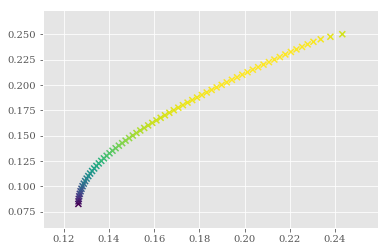

In [172]:
ind = np.argmin(tvols)
# Efficient Frontier 상의 point만 뽑아낸다.
evols = tvols[ind:]
erets = trets[ind:]
plt.scatter(evols, erets, c = erets / evols, marker = 'x')

In [175]:
tck = sci.splrep(evols, erets)

In [176]:
def f(x):
    '''Efficient Frontier(Spline Approximation)'''
    return sci.splev(x, tck, der = 0)
def df(x):
    '''1st derivative of E.F.'''
    return sci.splev(x, tck, der = 1)

In [178]:
def equations(p, rf = 0.01):
    a, b, x = p
    eq1 = a - rf
    eq2 = a + b * x - f(x)
    eq3 = b - df(x)
    return eq1, eq2, eq3

In [179]:
opt = sco.fsolve(equations, [0.01, 0.5, 0.15])

In [180]:
opt

array([0.01      , 1.00897422, 0.22411228])

In [182]:
## 검산
np.round(equations(opt),6)

array([0., 0., 0.])

Text(0.5,1,'Capital market line and tangency portfolio (star)\n for risk-free rate of 1')

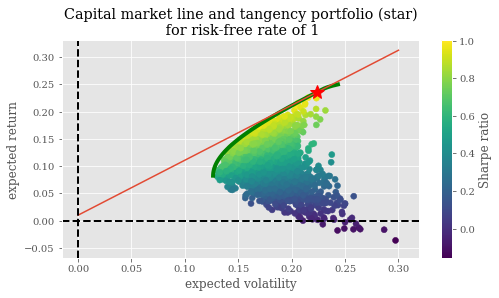

In [185]:
plt.figure(figsize = (8, 4))
# Randomly Generated pfo
plt.scatter(pvols, prets,
           c = (prets - 0.01) / pvols, marker = 'o')
plt.plot(evols, erets, 'g', lw = 4)
cx = np.linspace(0, 0.3)
# SML
plt.plot(cx, opt[0] + opt[1] * cx, lw = 1.5)
plt.plot(opt[2], f(opt[2]), 'r*', markersize = 15.0)
plt.grid(True)
plt.axhline(0, color='k', ls='--', lw=2.0)
plt.axvline(0, color='k', ls='--', lw=2.0)
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label = 'Sharpe ratio')
plt.title('Capital market line and tangency portfolio (star)\n for risk-free rate of 1')

#### Tangency Pfo's weight?

In [188]:
cons = ({'type': 'eq', 'fun': lambda x: statistics(x)[0] - f(opt[2])}, ## target return이 f(opt[2]), 즉 tangent pfo의 기대수익률이다.
        {'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
res = sco.minimize(min_func_port, init_w, method = 'SLSQP',
                   bounds = bnds, constraints = cons)

In [191]:
tangent_w = res['x'].round(3)
tangent_w

array([0.522, 0.026, 0.439, 0.   , 0.013])

## Principal Component Analysis(PCA)
DEF. 상관관계를 갖는 관측값 변수들의 집합을 직교변환(orthogonal transformation)을 통해 선형 상관관계를 가지지 않는 변수(주성분)들의 집합으로 바꾸는 통계적인 절차. 변환은 첫 번째 주성분이 (자료의 변동성을 가장 많이 설명하도록)가장 큰 분산을 갖고, 그 다음 성분이 이전의 주성분과 직교한다는 제약조건 하에 가장 큰 분산을 가지도록 정의한다.

eg. DJI(미국 Dow-Jones Index)는 30개의 주식으로 이루어진 주가지수인데, 지수를 구성하는 모든 주가의 움직임은 지수의 움직임을 결정한다. 개별 주가의 움직임들은 일반적인 경제 조건이나 특정한 섹터의 상황에 의해 일반적으로 상관관계를 가지게 된다. 통계적 관점에서 주가지수 하나의 움직임을 설명하기 위해 30개의 상관관계를 갖는 요인을 모두 사용하는 것은 매우 어렵다. 이 때 필요한 것이 주성분 분석이다. 이를 이용하면 주가지수의 움직임을 잘 설명할 수 있으면서도 서로 상관이 없는 몇 개의 성분(주성분)을 유도할 수 있다. 이는 몇 가지 주식을 선택하고 (포트폴리오처럼) 선형적으로 조합하는 것과 마찬가지이다.

PCA의 한계점 http://t-robotics.blogspot.com/2015/12/pca.html#.W26Sg1UzbIW

우리는 지수와 지수를 구성하는 주식들의 자료를 구한 후, pca를 통해 pca_index라는 주성분을 도출할 것이다. 특히 scikit-learn 라이브러리에서 KernelPCA 함수를 이용할 것이다.

In [195]:
import numpy as np
import pandas as pd
import warnings; warnings.simplefilter('ignore')
pd.core.common.is_list_like = pd.api.types.is_list_like
from pandas_datareader import data as pdr
import fix_yahoo_finance as yf
yf.pdr_override()
from sklearn.decomposition import KernelPCA

### DAX Index and its 30 stocks

In [196]:
symbols = ['ADS.DE', 'ALV.DE', 'BAS.DE', 'BAYN.DE', 'BEI.DE',
           'BMW.DE', 'CBK.DE', 'CON.DE', 'DAI.DE', 'DB1.DE',
           'DBK.DE', 'DPW.DE', 'DTE.DE', 'EOAN.DE', 'FME.DE',
           'FRE.DE', 'HEI.DE', 'HEN3.DE', 'IFX.DE', 'LHA.DE',
           'LIN.DE', 'LXS.DE', 'MRK.DE', 'MUV2.DE', 'RWE.DE',
           'SAP.DE', 'SDF.DE', 'SIE.DE', 'TKA.DE', 'VOW3.DE',
           '^GDAXI']

In [ ]:
%%time
data = pd.DataFrame()
for sym in symbols:
    data[sym] = pdr.get_data_yahoo(sym, start = '2016-1-1')['Adj Close']
data = data.dropna()
print('')

[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
